In [1]:
!pip install datasist

In [4]:
import pandas as pd
import numpy as np
import datasist as ds
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [5]:
pima = pd.read_csv('diabetes.csv')

In [6]:
ds.structdata.describe(pima)

First five data points


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1



Random five data points


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
482            4       85             58             22       49  27.8   
652            5      123             74             40       77  34.1   
373            2      105             58             40       94  34.9   
384            1      125             70             24      110  24.3   
701            6      125             78             31        0  27.6   

     DiabetesPedigreeFunction  Age  Outcome  
482                     0.306   28        0  
652                     0.269   28        0  
373                     0.225   25        0  
384                     0.221   25        0  
701                     0.565   49        1



Last five data points


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0



Shape of  data set: (768, 9)


Size of  data set: 6912


Data Types
Note: All Non-numerical features are identified as objects in pandas


Data Type
Pregnancies                  int64
Glucose                      int64
BloodPressure                int64
SkinThickness                int64
Insulin                      int64
BMI                        float64
DiabetesPedigreeFunction   float64
Age                          int64
Outcome                      int64



Numerical Features in Data set
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Categorical Features in Data set


[]



Statistical Description of Columns


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000



Description of Categorical Features


ValueError: No objects to concatenate

<AxesSubplot:xlabel='Outcome', ylabel='count'>

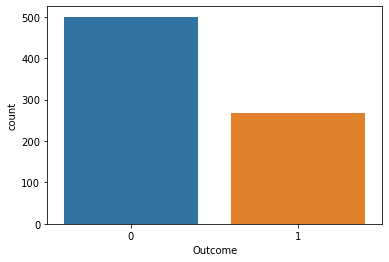

In [7]:
sns.countplot(x = 'Outcome', data = pima)

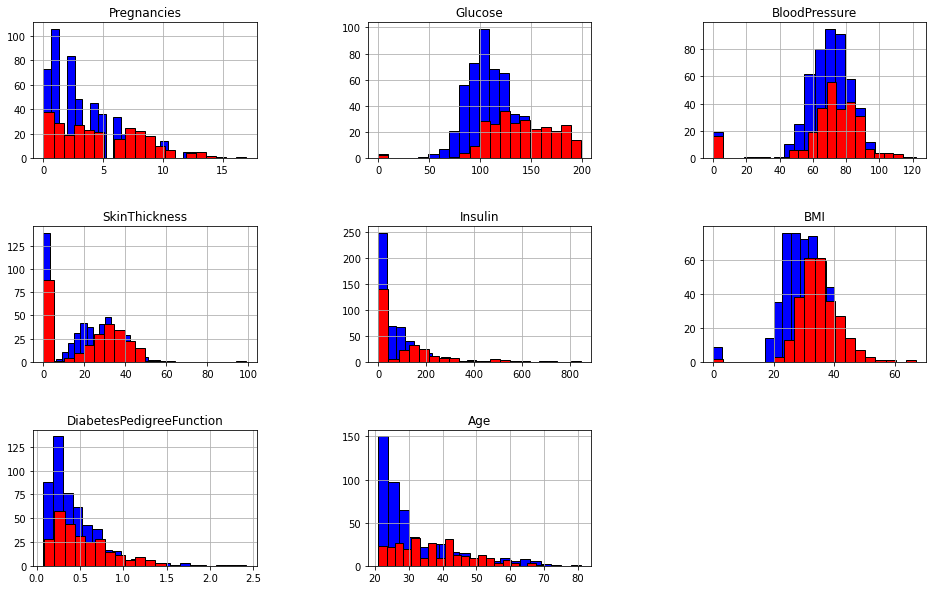

In [8]:
pima_1 = pima[pima.Outcome == 1]
pima_0 = pima[pima.Outcome == 0]
columns = pima.columns[:-1]

plt.subplots(figsize=(16,10))
number_features = len(columns)
for i,j,  in zip(columns, range(number_features)):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    pima_0[i].hist(bins=20, color='b', edgecolor='black')
    pima_1[i].hist(bins=20, color='r', edgecolor='black')
    plt.title(i)

<AxesSubplot:>

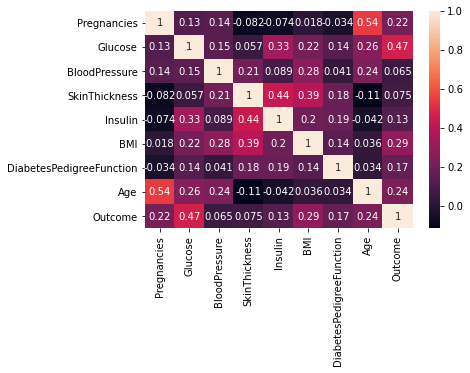

In [9]:
corr_mat = pima.corr()
sns.heatmap(corr_mat, annot = True)

## EDA

In [14]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [15]:
from pandas_profiling import ProfileReport

In [17]:
#EDA using Pandas Profiling
profile = ProfileReport(pima, title='PIDD Pandas Profiling Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile.to_file('pidd_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

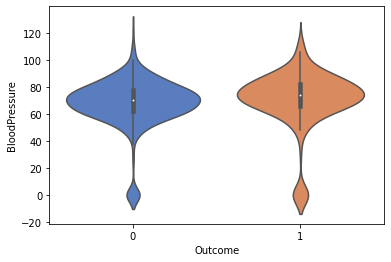

In [20]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=pima, palette='muted', split=True)

In [23]:
#Replacing the zero-values for Blood Pressure
pima1 = pima.loc[pima['Outcome'] == 1]
pima2 = pima.loc[pima['Outcome'] == 0]
pima1 = pima1.replace({'BloodPressure':0}, np.median(pima1['BloodPressure']))
pima2 = pima2.replace({'BloodPressure':0}, np.median(pima2['BloodPressure']))
dataframe = [pima1, pima2]
pima = pd.concat(dataframe)

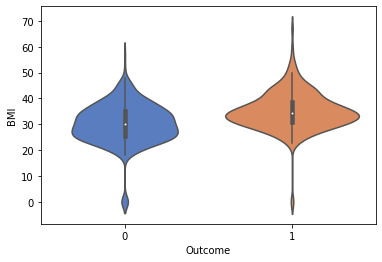

In [24]:
#Classifying the BMI based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=pima, palette='muted', split=True)

In [25]:
#Replacing the zero-values for BMI
pima1 = pima.loc[pima['Outcome'] == 1]
pima2 = pima.loc[pima['Outcome'] == 0]
pima1 = pima1.replace({'BMI':0}, np.median(pima1['BMI']))
pima2 = pima2.replace({'BMI':0}, np.median(pima2['BMI']))
dataframe = [pima1, pima2]
pima = pd.concat(dataframe)

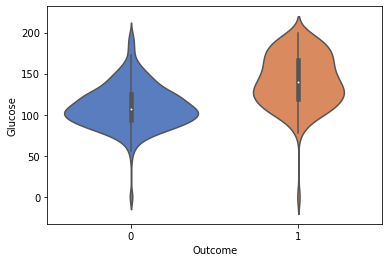

In [26]:
#Classifying the Glucose level based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=pima, palette='muted', split=True)

In [28]:
#Replacing the zero-values for Glucose
pima1 = pima.loc[pima['Outcome'] == 1]
pima2 = pima.loc[pima['Outcome'] == 0]
pima1 = pima1.replace({'Glucose':0}, np.median(pima1['Glucose']))
pima2 = pima2.replace({'Glucose':0}, np.median(pima2['Glucose']))
dataframe = [pima1, pima2]
pima = pd.concat(dataframe)

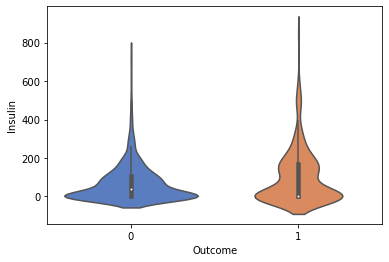

In [29]:
#Classifying the Glucose level based on class
ax = sns.violinplot(x='Outcome', y='Insulin', data=pima, palette='muted', split=True)

In [30]:
#Replacing the zero-values for Insulin
pima1 = pima.loc[pima['Outcome'] == 1]
pima2 = pima.loc[pima['Outcome'] == 0]
pima1 = pima1.replace({'Insulin':0}, np.median(pima1['Insulin']))
pima2 = pima2.replace({'Insulin':0}, np.median(pima2['Insulin']))
dataframe = [pima1, pima2]
pima = pd.concat(dataframe)

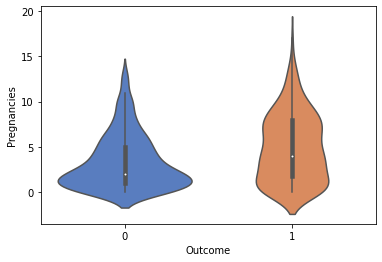

In [31]:
#Classifying the Pregnancies based on class
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=pima, palette='muted', split=True)

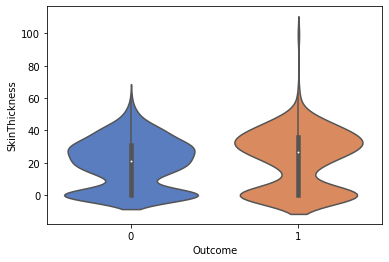

In [32]:
#Classifying the Pregnancies based on class
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=pima, palette='muted', split=True)

### Imputing Outliers - Scaling the data 

In [34]:
#Splitting the data into dependent and independent variables
Y = pima.Outcome
x = pima.drop('Outcome', axis = 1)
columns = x.columns
scaler = StandardScaler()
X = scaler.fit_transform(x)
pima_x = pd.DataFrame(X, columns = columns)

In [36]:
! pip3 install imblearn

In [51]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

## Model Training

In [52]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return {'accuracy' : acc,
            'precision' : prec,
            'recall' : recall,
            'accuracy count' : num_acc,
            'F1 Score' : f1,
            'Confusion Matrix' : cm
           }

In [53]:
def build_model(classifier_fn, name_of_y_col,
                name_of_x_cols, dataset,
                test_frac = 0.2):
    
    x = dataset[name_of_x_cols]
    y = dataset[name_of_y_col]
    
  
    x_train, x_test, y_train, y_test = train_test_split(pima_x, Y, test_size = test_frac)
    x_train, y_train = smt.fit_resample(x_train, y_train)
   
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                'y_pred' : y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {'training' : train_summary,
           'test' : test_summary,
           'confusion matrix' : model_crosstab}

In [43]:
np.bincount(y_train)

array([405, 405], dtype=int64)

In [44]:
def compare_results():
    
    for key in result_dict:
        print('Classification', key)
        
        print()
        print('Training Data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
            
        print()
        print('Testing Data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
            
        print()

In [47]:
FEATURES = list(pima.iloc[:, :-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [48]:
result_dict = {}

In [49]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear')
    
    model.fit(x_train, y_train)
    
    return model

In [54]:
result_dict['Diabetes_outcome - Logistic'] = build_model(logistic_fn, 'Outcome',
                                                FEATURES, pima)
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]



In [55]:
def linear_discriminat_fn(x_train, y_train, solver = 'svd'):
    
    model = LinearDiscriminantAnalysis(solver = solver)
    
    model.fit(x_train, y_train)
    
    return model

In [56]:
result_dict['Diabetes_outcome - LDA'] = build_model(linear_discriminat_fn, 'Outcome',
                                                FEATURES, pima)
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]



In [57]:
def quadratic_discriminat_fn(x_train, y_train):
    
    model = QuadraticDiscriminantAnalysis()
    
    model.fit(x_train, y_train)
    
    return model

In [58]:
result_dict['Diabetes_outcome - QDA'] = build_model(quadratic_discriminat_fn, 'Outcome',
                                                FEATURES, pima)

compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

In [59]:
def sgd_fn(x_train, y_train, max_iter = 10000, tol = 1e-3):
    
    model = SGDClassifier(max_iter = max_iter, tol = tol)
    model.fit(x_train, y_train)
    
    return model

In [60]:
result_dict['Diabetes_outcome - SGD'] = build_model(sgd_fn, 'Outcome',
                                                FEATURES, pima)

compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

In [62]:
def linear_svc_fn(x_train, y_train, max_iter = 10000, C =1.0, tol = 1e-3):
    
    model = LinearSVC(C = C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)
    
    return model

In [63]:
result_dict['Diabetes_outcome - SVC'] = build_model(linear_svc_fn, 'Outcome',FEATURES, pima)
                                                
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

In [64]:
def decision_tree_fn(x_train, y_train, max_depth = None, max_features = None):
    
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    model.fit(x_train, y_train)
    
    return model

In [65]:
result_dict['Diabetes_outcome - Decision Tree'] = build_model(decision_tree_fn, 'Outcome',FEATURES, pima)
                                                
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

In [66]:
def naive_bayes_fn(x_train, y_train, priors = None):
    
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)
    
    return model

In [67]:
result_dict['Diabetes_outcome - Naive-Bayes'] = build_model(naive_bayes_fn, 'Outcome',FEATURES, pima)
                                                
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

In [68]:
def knn_fn(x_train, y_train):
    
    model = KNeighborsClassifier(n_neighbors= 25)
    model.fit(x_train, y_train)
    
    return model

In [69]:
result_dict['Diabetes_outcome - KNN'] = build_model(knn_fn, 'Outcome',FEATURES, pima)
                                                
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

In [70]:
def random_forest_fn(x_train, y_train, max_depth = None, max_features = None, n_estimators = 70):
    
    model = RandomForestClassifier(max_depth=max_depth, max_features=max_features, n_estimators= n_estimators, oob_score= True, n_jobs= -1)
    model.fit(x_train, y_train)
    
    return model

In [71]:
result_dict['Diabetes_outcome - Random Forest'] = build_model(random_forest_fn, 'Outcome',FEATURES, pima)
                                                
compare_results()

Classification Diabetes_outcome - Logistic

Training Data
accuracy 0.763681592039801
precision 0.7746113989637305
recall 0.7437810945273632
accuracy count 614
F1 Score 0.7588832487309646
Confusion Matrix [[315  87]
 [103 299]]

Testing Data
accuracy 0.7792207792207793
precision 0.6833333333333333
recall 0.7321428571428571
accuracy count 120
F1 Score 0.706896551724138
Confusion Matrix [[79 19]
 [15 41]]

Classification Diabetes_outcome - LDA

Training Data
accuracy 0.7706766917293233
precision 0.7842105263157895
recall 0.7468671679197995
accuracy count 615
F1 Score 0.7650834403080874
Confusion Matrix [[317  82]
 [101 298]]

Testing Data
accuracy 0.7857142857142857
precision 0.6612903225806451
recall 0.7735849056603774
accuracy count 121
F1 Score 0.7130434782608696
Confusion Matrix [[80 21]
 [12 41]]

Classification Diabetes_outcome - QDA

Training Data
accuracy 0.7593984962406015
precision 0.7730870712401056
recall 0.7343358395989975
accuracy count 606
F1 Score 0.7532133676092545
Confus

##### Choosing the model with the highest parameters

In [72]:
clrf = RandomForestClassifier(max_depth= None, max_features= None, n_estimators= 70, oob_score= True, n_jobs= -1)
clrf.fit(x_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [75]:
y_pred = clrf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [79]:
#saving the model
import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(clrf, pickle_out)
pickle_out.close()

In [77]:
output = pima['Outcome']
output, uniques = pd.factorize(output)

In [78]:
output_pickle = open('output_pima.pickle', mode = 'wb')
pickle.dump(uniques, output_pickle)
output_pickle.close()